In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  datetime import datetime
from pandas import Series 
%matplotlib inline 
import warnings  
warnings.filterwarnings("ignore") #to ignore warnings


In [2]:
#reading the train and the test datasets 

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
#test.head(5)

In [3]:
#copy to preserve the dataset
train_original = train.copy() 
test_original  = test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
test.shape, train.shape

((5112, 2), (18288, 3))

In [6]:
#feature extraction
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime']  = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [7]:
for x in (train, test, test_original, train_original):
    x['year'] = x.Datetime.dt.year 
    x['month'] = x.Datetime.dt.month 
    x['day'] = x.Datetime.dt.day
    x['Hour'] = x.Datetime.dt.hour 

In [8]:
train['day of week'] = train['Datetime'].dt.dayofweek 
temp = train['Datetime']

def weekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return True
    else:
        return False
temp2 = train['Datetime'].apply(weekend) 
train['weekend']=temp2

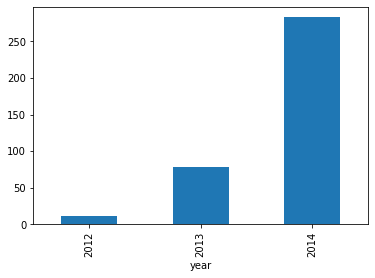

In [9]:
train.groupby('year')['Count'].mean().plot.bar()

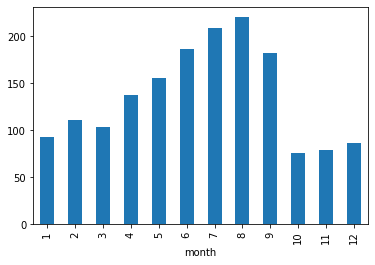

In [10]:
train.groupby('month')['Count'].mean().plot.bar()

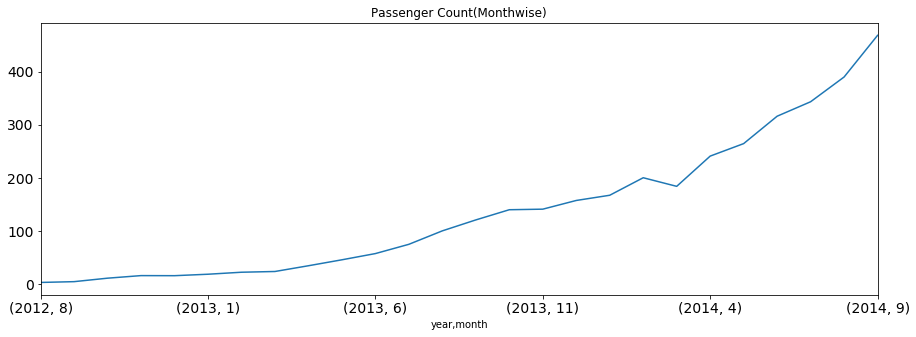

In [11]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

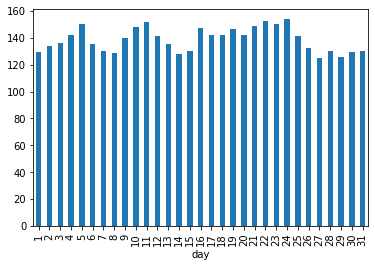

In [12]:
train.groupby('day')['Count'].mean().plot.bar()

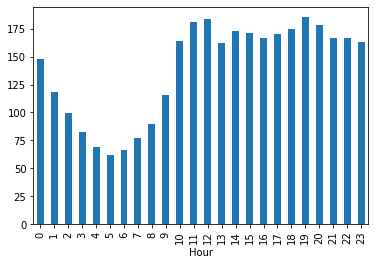

In [13]:
train.groupby('Hour')['Count'].mean().plot.bar()

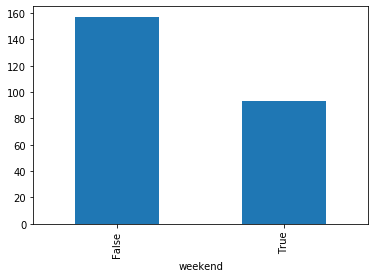

In [14]:
train.groupby('weekend')['Count'].mean().plot.bar()

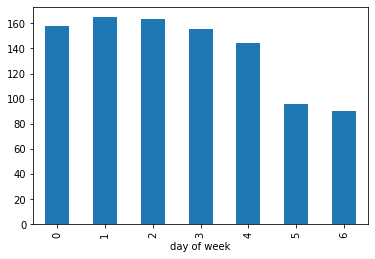

In [15]:
train.groupby('day of week')['Count'].mean().plot.bar()

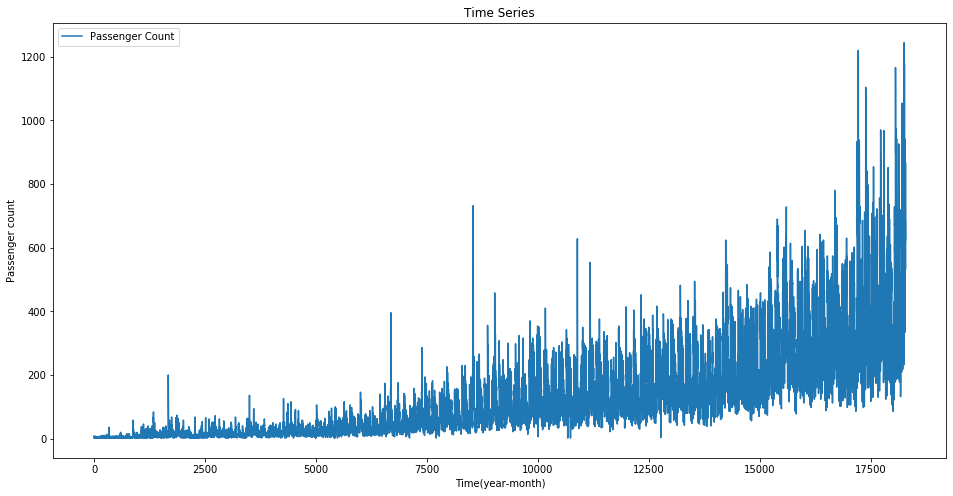

In [16]:
#train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

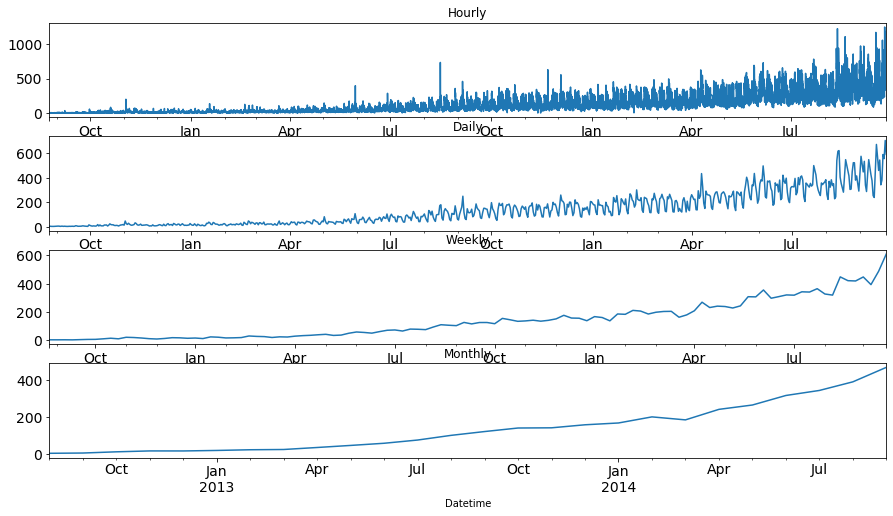

In [19]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
hourly = train.resample('H').mean() 
daily = train.resample('D').mean() 
weekly = train.resample('W').mean() 
monthly = train.resample('M').mean()

fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()

In [21]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

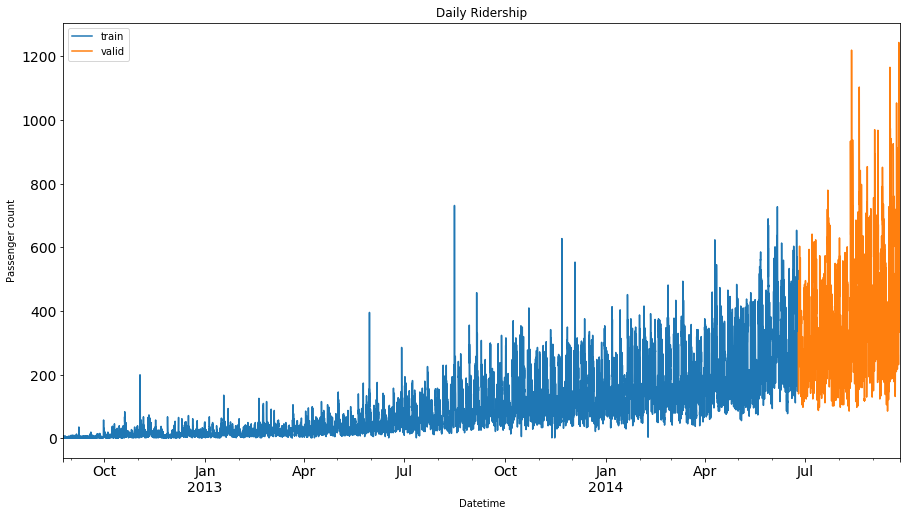

In [23]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.ylabel("Passenger count") 
plt.xlabel("Datetime")
plt.legend(loc='best')
plt.show()
